# Machine Learning

## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)
X.shape

(442, 10)

In [3]:
df = pd.DataFrame(data=np.c_[X, y], columns=datasets.load_diabetes().feature_names + ['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


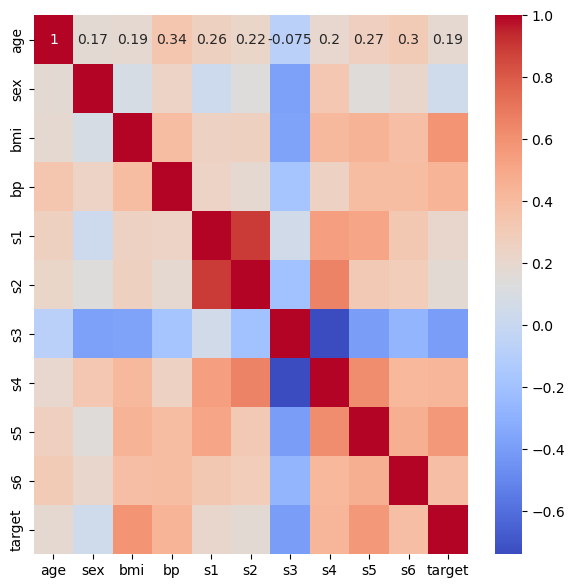

In [4]:
# finding the correlation between features and target

corr_matrix = df.corr()

plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

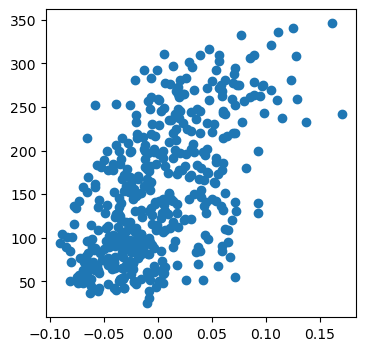

In [5]:
# selecting a feature
X = X[:, 2]

plt.figure(figsize=(4, 4))
plt.scatter(X, y)
plt.show()

### Gradient Descent:

$$h(x) = wx + b$$

$$J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h(x^{(i)}))^2$$

$$\frac{\partial J}{\partial w} = \frac{2}{m} \sum_{i=1}^{m} x^{(i)}(h(x^{(i)}) - y^{(i)})$$

$$\frac{\partial J}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})$$

$$w := w - \alpha \frac{\partial J}{\partial w}$$
$$b := b - \alpha \frac{\partial J}{\partial b}$$

In [6]:
w = 0
b = 0

alpha = 0.1
epochs = 10000

m = len(X)

for _ in range(epochs):
    y_pred = w*X + b
    dw = (2/m) * sum(X * (y_pred-y))
    db = (2/m) * sum(y_pred-y)
    w = w - alpha * dw
    b = b - alpha * db

print(w, b)

939.1577666689885 152.13348416289608


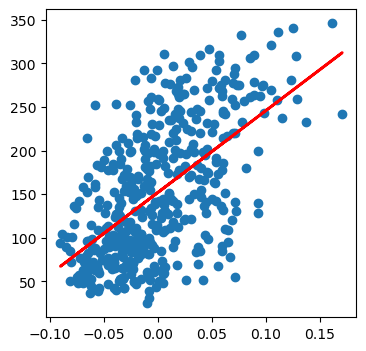

In [7]:
plt.figure(figsize=(4, 4))
plt.scatter(X, y)
plt.plot(X, y_pred, color="red", linewidth=2)
plt.show()

### Polynomial Regression

Polynomial Regression finds non-linear relationship between x and y.

$$y = b_0 + b_1x + b_2x^2 + ... + b_nx^n$$

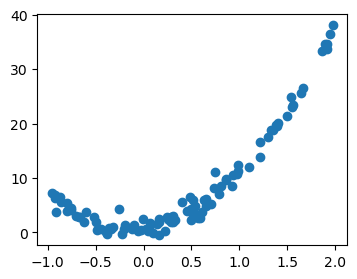

In [8]:
# generate some non-linear data
np.random.seed(2)
X = np.random.rand(100, 1) * 3 - 1
y = 8 * X**2 + 2 * X + 1 + np.random.randn(100, 1)

plt.figure(figsize=(4, 3))
plt.scatter(X, y)
plt.show()

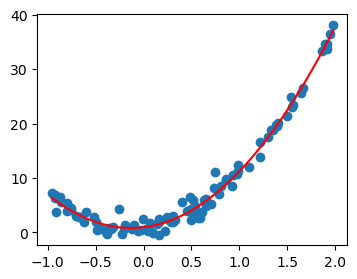

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# transform to polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# generate a continuous range of x values for plotting
x = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# transform the x values to polynomial features
x_poly = poly_features.transform(x)

y_pred = model.predict(x_poly)

plt.figure(figsize=(4, 3))
plt.scatter(X, y)
plt.plot(x, y_pred, color='red')
plt.show()